In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import dtale

import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.patches as mpatches


## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
Jadarat = pd.read_csv("data/Jadarat_data.csv")
Jadarat


,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
dtale.show(Jadarat)

In [5]:
Jadarat.shape

(1470, 18)

In [6]:
Jadarat.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


In [7]:
Jadarat.tail()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [8]:
Jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [9]:
Jadarat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [10]:
# we will see object columns
Jadarat.describe(include="object")

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
count,1470,1470,1470,1470,1470,1470,1470,1456,1380,780,1470,1470,1470,1470,1470,1470,1470
unique,324,92,438,444,886,894,2,7,361,615,14,114,393,2,25,6,3
top,بائع,09/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,both
freq,98,47,93,90,16,16,1465,635,65,28,622,523,449,1448,853,833,587


In [11]:
Jadarat["region"].value_counts()

region
الرياض             622
مكة المكرمة        369
المنطقة الشرقية    219
المدينة المنورة     86
الباحة              46
عسير                42
القصيم              32
حائل                18
تبوك                11
نجران                8
جازان                7
الجوف                5
الحدود الشمالية      4
اخرى                 1
Name: count, dtype: int64

In [12]:
# we will see number columns
Jadarat.describe()

,job_post_id
count,1.470000e+03
mean,2.020203e+13
std,5.863941e+04
min,2.020203e+13
25%,2.020203e+13
50%,2.020203e+13
75%,2.020203e+13
max,2.020203e+13


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [13]:
#the data is from, jadarat site ... it's a very good source.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [14]:
#this data it's two years old, for us we didn't need specific time to answers our questions.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [15]:
# we only have one dataset, i think it's good for know

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [16]:
#we will check if the column we need are good to answers any questions.
#we don't 

In [17]:
# we will see columns
Jadarat.describe(include="object")

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
count,1470,1470,1470,1470,1470,1470,1470,1456,1380,780,1470,1470,1470,1470,1470,1470,1470
unique,324,92,438,444,886,894,2,7,361,615,14,114,393,2,25,6,3
top,بائع,09/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,both
freq,98,47,93,90,16,16,1465,635,65,28,622,523,449,1448,853,833,587


In [18]:
Jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [19]:
# we confirm that we will have the columns we need.
# we decide to not drop any columns. 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [20]:
#we will see the dup rows.
Jadarat[Jadarat.duplicated(keep=False)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [21]:
#all the other columns have dup, but its just fine because its a normal to have dup in this types of columns.
#Jadarat[Jadarat["job_post_id"].duplicated()]

In [22]:
# go to delete duplicates columns
# Done

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [23]:
# we will see the NaN values.
Jadarat.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     90
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [24]:
Jadarat[Jadarat["comp_size"].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1296,مدير إداري,25/06/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,مكتب تصميم المشاريع للاستشارات الهندسية,4-1990473,خاص,NaN,NaN,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '12400.0']",دوام كامل,0 / 1,20202026404052,7 Years,M
1393,موظف صندوق محاسبة,01/07/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,NaN,المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026407308,0 Years,both
1399,موظف صندوق محاسبة,29/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,NaN,الرياض,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026407112,0 Years,both
1401,وسيط عقاري,29/06/1444,['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...,[' تقييم رغبات العملاء والميزانيات المحددة و...,مؤسسة فانس العقارية,1-2268591,خاص,NaN,NaN,"['Skill data', 'عقاري', 'مبتدئ', 'Language dat...",الرياض,RUMAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026407053,0 Years,F
1409,محامي,29/06/1444,['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...,[' استقبال القضية وتحديد نوعها وتحليل عناصره...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026406912,2 Years,both
1411,أخصائي قانوني,29/06/1444,['مساعدة العملاء والمنشآت في مختلف المسائل الق...,[' تأهيل الطلبات وتقييم الخيارات القانونية، ...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Skill data', 'إدارة وتنظيم المستندات والوثائ...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406840,0 Years,both
1421,مدير مالي,29/06/1444,['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...,[' المشاركة في تطوير الأهداف الرئيسية للإدار...,شركة إرفاء المحدودة (شركة شخص واحد),17-1989300,خاص,NaN,NaN,NaN,حائل,ABA AL HI...,"['Salary', '14000.0']",دوام كامل,0 / 1,20202026406695,7 Years,both
1426,مصفف شعر,29/06/1444,['تقديم المشورة للعميل وتسريح الشعر وتصفيفه وت...,[' استقبال العميل وإجلاسه على كرسي القص ووض...,صالون تشرين ثاني للتزيين النسائي,1-2593881,خاص,NaN,NaN,"['Skill data', 'صف الشعر', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406598,4 Years,F
1432,موظف صندوق محاسبة,27/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مؤسسة التذوق الحلو لتقديم الوجبات,1-2559144,خاص,NaN,NaN,NaN,الرياض,AL BIYAD...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406120,0 Years,M
1436,أخصائي علاج طبيعي,26/06/1444,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مجمع ارجوان سامي بن نائف العتيبي الطبي,2-1949575,خاص,NaN,NaN,NaN,الرياض,AL KHARJ...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026405893,0 Years,F


In [25]:
Jadarat[Jadarat["eco_activity"].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
25,مدير عام,26/05/1444,['المشاركة في وضع الأهداف العامة والسياسات وال...,[' المشاركة في وضع الأهداف والسياسات والمباد...,ورشة اضواء المشاعل للحدادة والالمنيوم,10-2010602,خاص,صغيرة فئة أ,NaN,"['Skill data', 'حداد', 'متوسط', 'Language data...",المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026348601,0 Years,M
40,مدير فرع,25/05/1444,['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...,[' المشاركة في وضع وإعداد الخطط والأهداف الخ...,شركة الزي للتجارة,9-2079452,خاص,متوسطة فئة أ,NaN,"['Language data', 'العربية', 'محترف', 'الانجلي...",المنطقة الشرقية,DHAHRAN...,"['Salary', '4500.0', 'Benefits', 'حسب سنوات ال...",دوام كامل,0 / 1,20202026347650,2 Years,both
42,موظف استقبال فندق,25/05/1444,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق قصر الواحة الفندقية,1-2440535,خاص,صغيرة فئة ب,NaN,"['Skill data', 'الاستقبال الفندقي', 'محترف', '...",الرياض,AR RIYADH...,"['Salary', '4500.0', 'Benefits', 'تارقت شهري',...",دوام كامل,0 / 4,20202026347394,2 Years,both
47,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,NaN,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,مشرف مدخلي البيانات,26/06/1444,['الإشراف على مدخلي البيانات والتأكد من صحة ال...,[' تدقيق البيانات بعد إدخالها، والتأكد من صح...,خالد عوض الجوهي للمقاولات,1-2073853,خاص,NaN,NaN,"['Skill data', 'اتقان الحاسب ', 'متوسط', 'Lang...",الرياض,HAFIRAT N...,"['Salary', '4500.0']",دوام كامل,0 / 5,20202026405354,0 Years,both
1451,فني مختبر طبي,25/06/1444,['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...,[' تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...,مجمع ابتسامة العائلة الطبي,1-2599562,خاص,NaN,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026404173,0 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


In [26]:
Jadarat[Jadarat["qualif"].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
14,مصمم جرافيك,26/05/1444,['لديه الخبرة في اخراج العروض التقديمية الرس...,['لديه الخبرة في اخراج العروض التقديمية الرس...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026349504,4 Years,M
15,مدخل بيانات,26/05/1444,['التمكن من استخدام برامج مايكروسفت أوفيس'],['التمكن من استخدام برامج مايكروسفت أوفيس'],مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '3000.0']",دوام كامل,0 / 2,20202026349475,2 Years,M
16,مطور برامج,26/05/1444,[' تحليل وادارة تطبيقات باستخدام الأدوات البر...,[' تحليل وادارة تطبيقات باستخدام الأدوات ال...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '9000.0']",دوام كامل,0 / 1,20202026349439,4 Years,M
17,أخصائي إدارة اداء,26/05/1444,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '12000.0']",دوام كامل,0 / 1,20202026349417,10 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,أخصائي عمليات موارد بشرية,25/06/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركـة ذوق للتجارة,1-1526321,خاص,صغيرة فئة ب,البيع بالتجزئة للوكلاء بالعمولة بدون محلات,NaN,الرياض,AR RIYADH...,"['Salary', '5556.0']",دوام كامل,0 / 1,20202026403956,0 Years,F
1455,فني تصميم داخلي,24/06/1444,['تصميم أنظمة الألوان وطرز الأثاث، والمواد الم...,[' وضع التصاميم للمشروعات الداخلية، وإدارة ف...,شركة نمو للبحوث والدراسات (شركة شخص واحد),1-2166711,خاص,صغيرة فئة أ,مراكز البحوث والدراسات الاجتماعية,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0', 'Benefits', 'عموله']",دوام كامل,0 / 1,20202026403328,2 Years,both
1460,كيميائي,23/06/1444,['دراسة خصائص المواد الكميائية للصناعات الكيمي...,[' إعداد برامج تشغيل الأجهزة والمعدات المخبر...,شركة نواف صالح البطي للتجارة,1-2604723,خاص,صغيرة فئة ب,تجارة الجملة والتجزئه في أنواع أخرى من المركبا...,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026402275,0 Years,F
1464,بائع,21/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,8-1977608,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026401107,2 Years,F


In [27]:
# go to clean them 
# Done

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [28]:
Jadarat.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


In [29]:
# check columns types 
Jadarat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [30]:
# go to clean them 
# done 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


## handles the dup

In [31]:
Jadarat.drop_duplicates(inplace=True)

## Fill the NaN

In [32]:
Jadarat["comp_size"] = Jadarat["comp_size"].fillna("لا يوجد نص")
Jadarat["eco_activity"] = Jadarat["eco_activity"].fillna("لا يوجد نص")
Jadarat["qualif"] = Jadarat["qualif"].fillna("البيانات غير مكتمله")

## change the data type 

In [33]:
Jadarat["comp_no"].unique()

array(['1-317262', '4-1324428', '1-155294', '8-1925495', '1-2356639',
       '1-1527188', '9-2027654', '1-2397423', '9-2046127', '3-1971776',
       '9-2117904', '13-1946886', '1-321449', '9-170461', '1-2222975',
       '1-2089504', '13-97350', '10-2010602', '1-1118487', '1-2420217',
       '1-2421924', '1-2404398', '1-2254620', '6-1958652', '10-2012715',
       '14-1953483', '4-2002778', '9-2079452', '20-1958829', '1-2440535',
       '9-1386554', '1-203353', '4-2009325', '1-2082101', '1-2239765',
       '29-1959880', '1-2500658', '1-2432212', '8-1971512', '1-1384889',
       '3-1955781', '1-280523', '34-1951545', '1-1080292', '1-2444577',
       '1-2455778', '20-1955938', '3-1975905', '1-2327153', '1-2200070',
       '1-117181', '1-2600256', '21-1947101', '13-79139', '1-1778274',
       '12-1963018', '1-2156848', '1-2468985', '9-140208', '1-284490',
       '9-1382513', '9-2017824', '15-1701226', '1-222221', '9-90208',
       '1-1328981', '1-2042663', '11-1784778', '6-11710', '15-3317'

In [34]:
# clean the columns types
# we only need to change column > comp_no
#Jadarat["comp_no"] = pd.to_numeric(Jadarat["comp_no"].astype(str).str.replace("-", ""), errors="coerce")
#Jadarat = Jadarat.dropna(subset=["comp_no"])
#Jadarat["comp_no"] = Jadarat["comp_no"].astype(int)

In [35]:
Jadarat["comp_no"].unique()

array(['1-317262', '4-1324428', '1-155294', '8-1925495', '1-2356639',
       '1-1527188', '9-2027654', '1-2397423', '9-2046127', '3-1971776',
       '9-2117904', '13-1946886', '1-321449', '9-170461', '1-2222975',
       '1-2089504', '13-97350', '10-2010602', '1-1118487', '1-2420217',
       '1-2421924', '1-2404398', '1-2254620', '6-1958652', '10-2012715',
       '14-1953483', '4-2002778', '9-2079452', '20-1958829', '1-2440535',
       '9-1386554', '1-203353', '4-2009325', '1-2082101', '1-2239765',
       '29-1959880', '1-2500658', '1-2432212', '8-1971512', '1-1384889',
       '3-1955781', '1-280523', '34-1951545', '1-1080292', '1-2444577',
       '1-2455778', '20-1955938', '3-1975905', '1-2327153', '1-2200070',
       '1-117181', '1-2600256', '21-1947101', '13-79139', '1-1778274',
       '12-1963018', '1-2156848', '1-2468985', '9-140208', '1-284490',
       '9-1382513', '9-2017824', '15-1701226', '1-222221', '9-90208',
       '1-1328981', '1-2042663', '11-1784778', '6-11710', '15-3317'

In [36]:
# go back to 6th dimention --> Completeness
# done

### Correcting errors

-------------------

In [37]:
skill_standardization = {
    "اللغة الانجليزية": "اللغة الإنجليزية",
    "الانجليزيه": "اللغة الإنجليزية",
    "اللغة العربيه": "اللغة العربية",
    "العربيه": "اللغة العربية",
    "تحمل ضغط العمل": "تحمل ضغط العمل - محترف",
    "مهارات تواصل": "مهارات التواصل",
    "مهارات في الحاسب": "مهارات الحاسب الآلي",
    "خبرة في المبيعات": "خبرة في التسويق والمبيعات"
}

# standardization
Jadarat["qualif"] = Jadarat["qualif"].replace(skill_standardization, regex=True)

In [38]:
Jadarat["qualif"].unique()
#Done

array(["['Language data', 'اللغة الإنجليزية', 'محترف']",
       'البيانات غير مكتمله',
       "['Skill data', 'صيانة السيارات وتقييم الاعطال', 'محترف']",
       "['Skill data', 'تحمل ضغط العمل - محترف', 'محترف', 'Language data', 'الانجليزية', 'متوسط', 'Professional certificate \\\\ License data', 'التسجيل في هيئة المحاسبين السعوديين', 'مفيد']",
       "['Skill data', 'اجادة الحاسب والتقنية ', 'متوسط', 'Language data', 'اللغة الإنجليزية ', 'مبتدئ']",
       "['Language data', 'لغة انجليزية', 'محترف']",
       "['Language data', 'لغة انجليزية', 'محترف', 'Professional certificate \\\\ License data', 'PMP', 'ضروري']",
       "['Language data', 'لغة انجليزية', 'متوسط']",
       "['Skill data', 'تسويق', 'مبتدئ']",
       "['Language data', 'انجليزية', 'متوسط']",
       "['Skill data', 'التسويق', 'مبتدئ', 'كتابة المحتوى', 'مبتدئ', 'مهارات التفاوض', 'مبتدئ', 'Language data', 'العربية', 'محترف', 'الانجليزية', 'متوسط']",
       "['Language data', 'الانجليزي ', 'متوسط', 'Professional certificate 

## fix city values.

In [39]:
city_counts_before = Jadarat["city"].value_counts()
Jadarat["city"] = Jadarat["city"].astype(str).str.strip().str.replace(r"\.+$", "", regex=True).str.title()

city_standardization = {
    "Ar Riyadh": "Riyadh",
    "Jeddah": "Jeddah",
    "Ad Dammam": "Dammam",
    "Makkah Al Mukarramah": "Mecca",
    "Al Khubar": "Al Khobar",
    "An Naq'a": "An Naqa",
    "As Saffan": "As Saffaniyah",
    "Al Atawla": "Al Atawlah",
    "Al Hafair": "Al Hafayer",
    "Al Khafji": "Khafji"
}

Jadarat["city"] = Jadarat["city"].replace(city_standardization)

## Change the benefits to int


In [40]:
def extract_numeric_benefit_simple(value):
    value = value.replace("[", "").replace("]", "").replace("'", "").split(",")

    for item in value:
        item = item.strip()  
        if item.replace('.', '').isdigit():  
            return int(float(item))  

    return None  

Jadarat["benefits"] = Jadarat["benefits"].apply(extract_numeric_benefit_simple)

# changes
Jadarat.dtypes["benefits"], Jadarat["benefits"].head()


(dtype('int64'),
 0    5000
 1    5000
 2    4000
 3    5000
 4    5000
 Name: benefits, dtype: int64)

## change the to int

In [41]:
def extract_numeric_exper(value):
    if isinstance(value, int):  
        return value
    if isinstance(value, float):  
        return int(value)
    if isinstance(value, str):  
        value = value.lower().replace("years", "").strip()  
        if value.replace('.', '').isdigit():  
            return int(float(value))  

    return None  

Jadarat["exper"] = Jadarat["exper"].apply(extract_numeric_exper)

# changes
Jadarat.dtypes["exper"], Jadarat["exper"].head()


(dtype('int64'),
 0    0
 1    0
 2    2
 3    0
 4    0
 Name: exper, dtype: int64)

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [42]:
# we will see if we have outliers in our data after the viualization 

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### Clean Data

In [43]:
new_Jadarat = pd.read_excel("data/Cleaned_Jadarat.xlsx")
new_Jadarat



,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الإنجليزية', 'محترف']",الرياض,Riyadh,5000,دوام كامل,0 / 1,20202026350419,0,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,البيانات غير مكتمله,المنطقة الشرقية,Dammam,5000,دوام كامل,0 / 3,20202026350389,0,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'اللغة الإنجليزية', 'محترف']",الرياض,Ath Thuma,4000,دوام كامل,0 / 2,20202026350347,2,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,لا يوجد نص,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,Al Hufuf,5000,دوام كامل,0 / 10,20202026350219,0,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل - محترف', 'محتر...",الرياض,Riyadh,5000,دوام كامل,0 / 1,20202026350043,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,بائع,21/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,8-1977608,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,البيانات غير مكتمله,المنطقة الشرقية,Al Hufuf,4000,دوام كامل,0 / 1,20202026401107,2,F
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,البيانات غير مكتمله,الرياض,Riyadh,5500,دوام كامل,0 / 1,20202026400353,0,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,Jeddah,4000,دوام كامل,0 / 1,20202026399849,2,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,لا يوجد نص,"['Professional certificate \\ License data', '...",الرياض,Riyadh,7000,دوام كامل,0 / 1,20202026399061,0,both


In [44]:
#first we will see the column types.
new_Jadarat.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits         int64
contract        object
positions       object
job_post_id      int64
exper            int64
gender          object
dtype: object

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [45]:
pie = new_Jadarat["city"].value_counts()
pie

city
Riyadh           522
Jeddah           245
Dammam            78
Makkah Al         72
Al Khobar         54
                ... 
An Naq'A           1
As Saffaniyah      1
Al Atawlah         1
Al Hafayer         1
Khafji             1
Name: count, Length: 114, dtype: int64

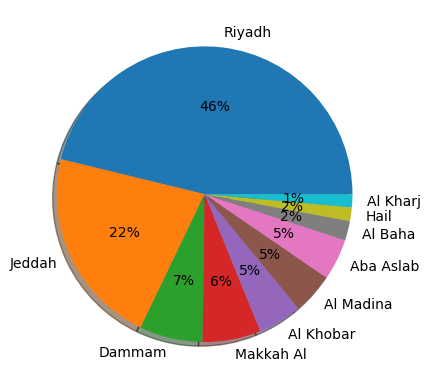

In [46]:
#pie chart for city that are in our data and the disturbution of it. 
plt.pie(x=pie[:10].values,
        labels=pie[:10].index,
        autopct='%1.0f%%',
        #startangle=45,
        shadow=True,
        #explode = [0.3,0.2]
       )
plt.show()

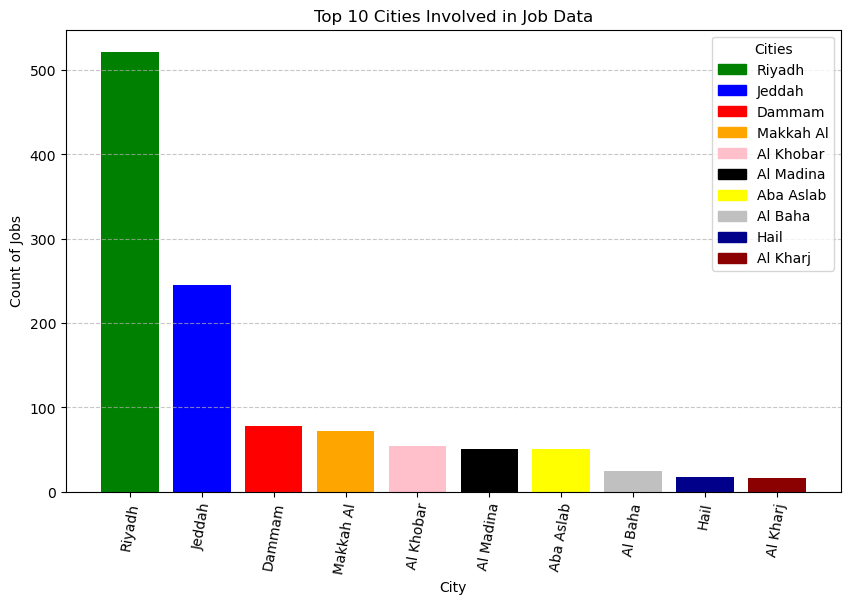

In [47]:
# Count the number of jobs per city
city_counts = new_Jadarat["city"].value_counts()
colors = ['green', 'blue', 'red', 'orange', "pink", "black", "yellow", "silver", "darkblue", "darkred"]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    city_counts.index[:10],  # Top 10 cities
    city_counts.values[:10],  # Corresponding job counts
    color=colors
)
plt.ylabel("Count of Jobs")
plt.xlabel("City")
plt.title("Top 10 Cities Involved in Job Data")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability

patches = [mpatches.Patch(color=colors[i], label=city_counts.index[i]) for i in range(10)]
plt.legend(handles=patches, title="Cities", loc="upper right")

# Show the plot
plt.show()


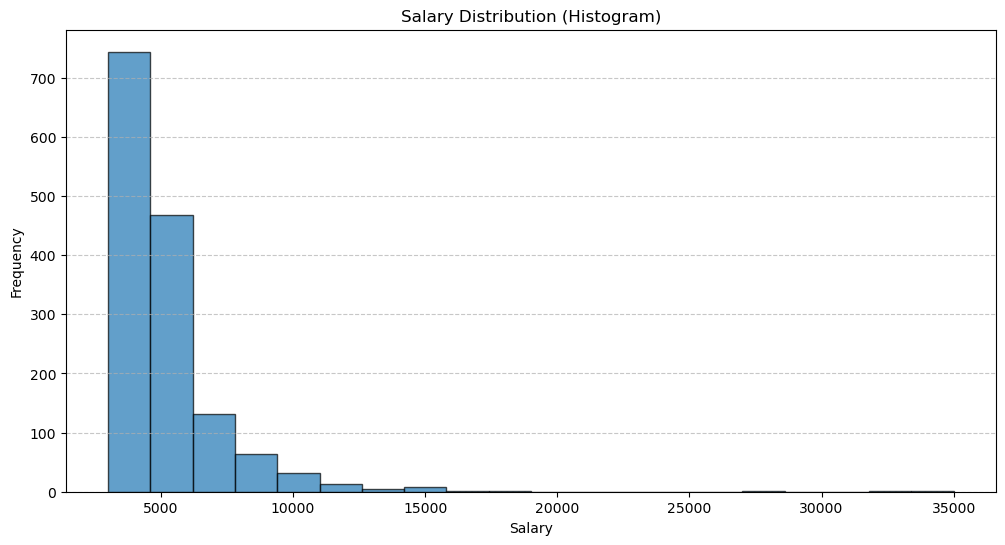

In [48]:
# Plot the salary frequency distribution as a histogram
plt.figure(figsize=(12, 6))
plt.hist(new_Jadarat['benefits'].dropna(), bins=20, edgecolor='black', alpha=0.7)

# Formatting the chart
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution (Histogram)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

## Histogram and bar chart

In [49]:
#We cant use bar or box because all the data are strings.

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

<Figure size 1200x600 with 0 Axes>

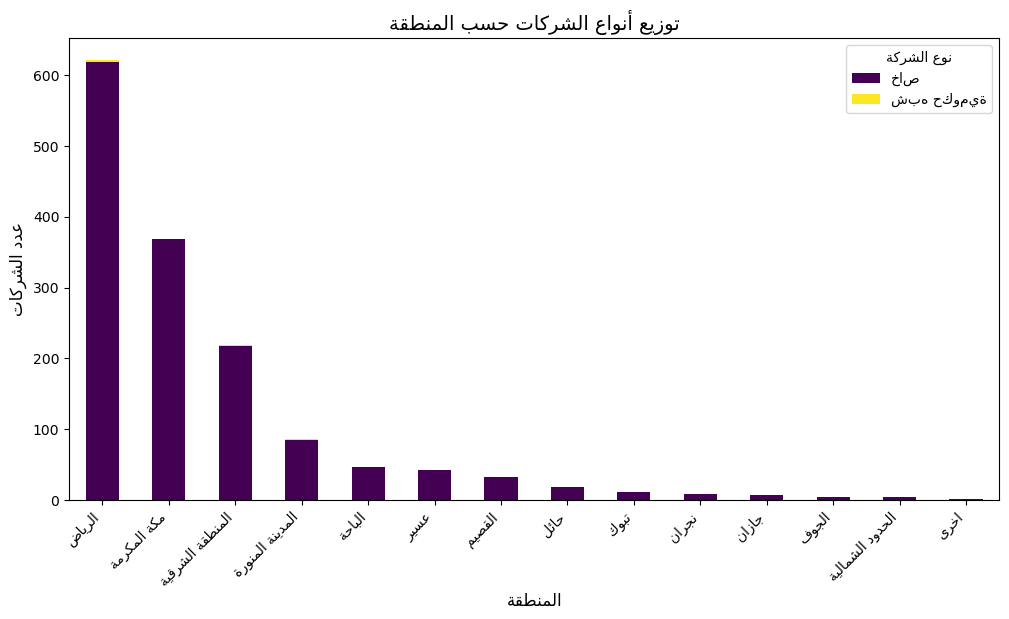

In [50]:
# Check if relevant columns exist in the dataset
if "region" in Jadarat.columns and "comp_type" in Jadarat.columns:
    # Group data by region and company type, sorting by total count
    chart_data = Jadarat.groupby(["region", "comp_type"]).size().unstack()
    chart_data["Total"] = chart_data.sum(axis=1)  # Create a total count column
    chart_data = chart_data.sort_values(by="Total", ascending=False).drop(columns=["Total"])  # Sort and drop helper column

    # Fix Arabic text rendering using arabic_reshaper & bidi.algorithm
    chart_data.index = chart_data.index.map(lambda x: get_display(arabic_reshaper.reshape(x)))

    title_text = get_display(arabic_reshaper.reshape('توزيع أنواع الشركات حسب المنطقة'))
    xlabel_text = get_display(arabic_reshaper.reshape('المنطقة'))
    ylabel_text = get_display(arabic_reshaper.reshape('عدد الشركات'))
    legend_title = get_display(arabic_reshaper.reshape('نوع الشركة'))

    # Create the sorted stacked bar chart
    plt.figure(figsize=(12, 6))
    chart_data.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))

    # Apply Arabic-friendly fonts and correct text orientation
    plt.xlabel(xlabel_text, fontsize=12)
    plt.ylabel(ylabel_text, fontsize=12)
    plt.title(title_text, fontsize=14)
    plt.legend(title=legend_title, fontsize=10)

    # Adjust text readability for Arabic
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)

    # Show the chart
    plt.show()
else:
    print(get_display(arabic_reshaper.reshape("لم يتم العثور على أعمدة مناسبة لرسم المخطط العمودي المكدس.")))


**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

In [ ]:
#We cant scatter plot, histogram, box plot because most the data are strings.

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

# Answers


# Q1

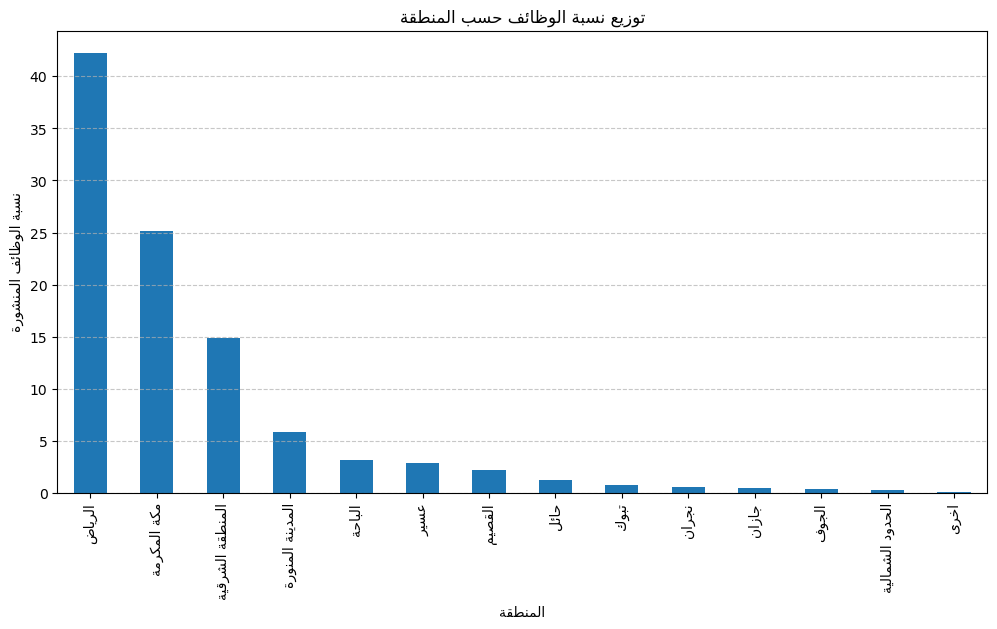

In [52]:
import arabic_reshaper
from bidi.algorithm import get_display

# Reshape and display Arabic text correctly
region_proportion_fixed = new_Jadarat['region'].value_counts(normalize=True) * 100
region_proportion_fixed.index = [get_display(arabic_reshaper.reshape(region)) for region in region_proportion_fixed.index]

# Plot the proportion of job postings by region with correctly displayed Arabic labels
plt.figure(figsize=(12, 6))
region_proportion_fixed.plot(kind='bar')

# Formatting the chart
plt.xlabel(get_display(arabic_reshaper.reshape('المنطقة')))  # Arabic for "Region"
plt.ylabel(get_display(arabic_reshaper.reshape('نسبة الوظائف المنشورة')))  # Arabic for "Percentage of Job Postings"
plt.title(get_display(arabic_reshaper.reshape('توزيع نسبة الوظائف حسب المنطقة')))  # Arabic for "Proportion of Job Postings by Region"
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()




# Q2

C:\Users\ish3e\AppData\Local\Temp\ipykernel_18652\2848957549.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ish3e\AppData\Local\Temp\ipykernel_18652\2848957549.py:15: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



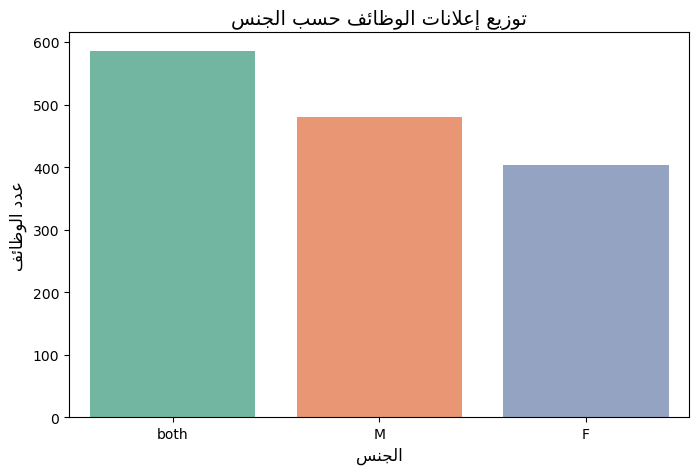

In [53]:

# Check if the 'gender' column exists in the dataset
if "gender" in Jadarat.columns:
    # Count occurrences of each gender category
    gender_counts = Jadarat["gender"].value_counts()

    # Fix Arabic text rendering using arabic_reshaper & bidi.algorithm
    gender_counts.index = gender_counts.index.map(lambda x: get_display(arabic_reshaper.reshape(x)))

    title_text = get_display(arabic_reshaper.reshape("توزيع إعلانات الوظائف حسب الجنس"))
    xlabel_text = get_display(arabic_reshaper.reshape("الجنس"))
    ylabel_text = get_display(arabic_reshaper.reshape("عدد الوظائف"))

    # Create a bar chart
    plt.figure(figsize=(8, 5))
    sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=sns.color_palette("Set2"))

    # Apply labels and title
    plt.xlabel(xlabel_text, fontsize=12)
    plt.ylabel(ylabel_text, fontsize=12)
    plt.title(title_text, fontsize=14)

    # Show the chart
    plt.show()
else:
    print(get_display(arabic_reshaper.reshape("لم يتم العثور على عمود 'gender' داخل البيانات.")))


# Q3

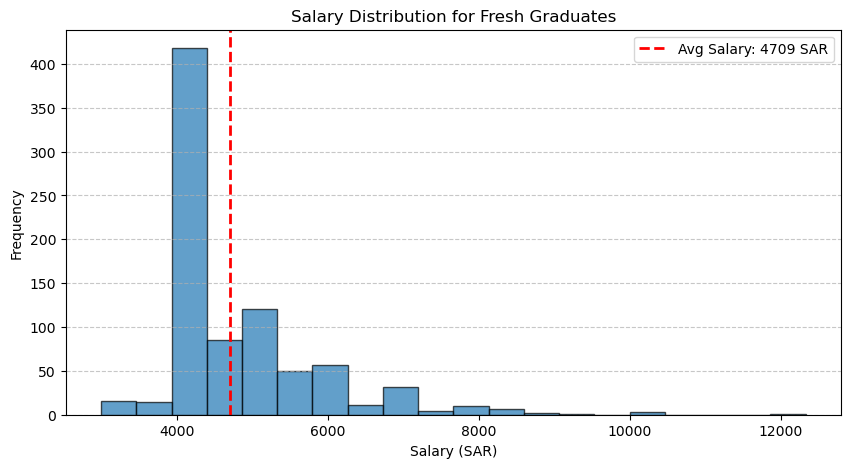

In [56]:
import matplotlib.pyplot as plt

# Convert benefits (salary) to numeric values
new_Jadarat['benefits'] = pd.to_numeric(new_Jadarat['benefits'], errors='coerce')

# Filter data for fresh graduates (assuming experience '0' represents fresh graduates)
fresh_grads = new_Jadarat[new_Jadarat['exper'] == 0]

# Get the salary range for fresh graduates
salary_min = fresh_grads['benefits'].min()
salary_max = fresh_grads['benefits'].max()
salary_mean = fresh_grads['benefits'].mean()

# Plot the salary distribution for fresh graduates
plt.figure(figsize=(10, 5))
plt.hist(fresh_grads['benefits'].dropna(), bins=20, edgecolor='black', alpha=0.7)

# Formatting the chart
plt.xlabel('Salary (SAR)')
plt.ylabel('Frequency')
plt.title('Salary Distribution for Fresh Graduates')
plt.axvline(salary_mean, color='red', linestyle='dashed', linewidth=2, label=f'Avg Salary: {int(salary_mean)} SAR')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Q4

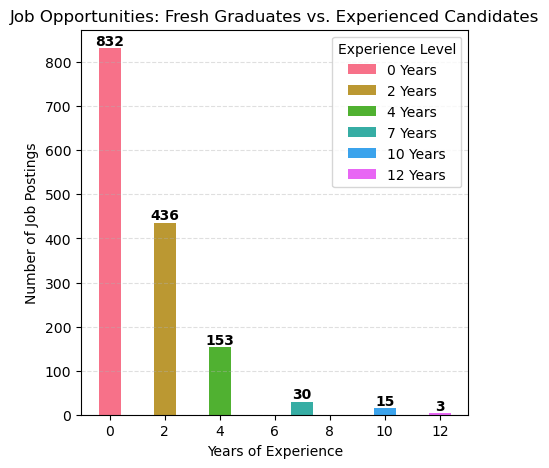

In [66]:
# Convert 'benefits' (salary) to numeric values
new_Jadarat['benefits'] = pd.to_numeric(new_Jadarat['benefits'], errors='coerce')

# Count the number of job postings for different experience levels
experience_counts = new_Jadarat['exper'].value_counts().sort_index()

# Set a color palette
palette = sns.color_palette("husl", len(experience_counts))

# Plot the distribution of job opportunities based on experience requirements
plt.figure(figsize=(5, 5))
bars = plt.bar(experience_counts.index, experience_counts.values, color=palette)

# Formatting the chart
plt.xlabel('Years of Experience')
plt.ylabel('Number of Job Postings')
plt.title('Job Opportunities: Fresh Graduates vs. Experienced Candidates')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add specific numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add a legend in the top-right corner with color mapping
legend_labels = [f"{exp} Years" for exp in experience_counts.index]
plt.legend(bars, legend_labels, title="Experience Level", loc='upper right', fontsize=10, frameon=True)

# Show the plot
plt.show()
